In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# # Load all 12 sheets and combine
# excel_path = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\\four_vs_station.xlsx'
# df = pd.concat(pd.read_excel(excel_path, sheet_name=None), ignore_index=True)

# # Convert date properly
# df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d', errors='coerce')

# # Convert numeric columns to float
# for col in ['FH', 'T', 'DR', 'RH']:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Group by station and hour
# hourly_avg = df.groupby(['STN', 'HH']).agg({
#     'FH': 'mean',
#     'T': 'mean',
#     'DR': 'mean',
#     'RH': 'mean'
# }).reset_index()

# sns.set(style="whitegrid")

In [63]:
# # Manasa code
# # Wind Speed (FH)
# plt.figure(figsize=(10,6))
# sns.lineplot(data=hourly_avg, x='HH', y='FH', hue='STN', marker='o')
# plt.title('Hourly Variation of Wind Speed (FH) across Stations')
# plt.xlabel('Hour of the Day (1–24)')
# plt.ylabel('Average Wind Speed (0.1 m/s)')
# plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [64]:
import json

# Files is still not in the branch
path_2023 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2023.json'
path_2024 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2024.json'

with open(path_2023, 'r') as file:
    raw_2023 = json.load(file)

with open(path_2024, 'r') as file:
    raw_2024 = json.load(file)

df_2023 = pd.DataFrame(raw_2023)
df_2024 = pd.DataFrame(raw_2024)

# FH    - Hourly average wind speed (in 0.1 m/s)
# T     - Temperature (in 0.1 degrees Celsius) at 1.50 m altitude during the observation
# DR    - Duration of precipitation (in 0.1 hour) per hourly section
# RH    - Hourly Sum of Precipitation (in 0.1 mm) (-1 for <0.05 mm)

df_2023.loc[df_2023["RH"] == -1, "RH"] = 0.05

df_2023['T'] = df_2023['T'] * 0.1   # turn into C
df_2023['RH'] = df_2023['RH'] * 0.1  # turn into mm

df_2023.tail()


,station_code,date,hour,FH,T,DR,RH
39739,391,2023-12-04T00:00:00.000Z,20,50.0,1.8,10.0,1.1
39740,391,2023-12-04T00:00:00.000Z,21,50.0,2.2,10.0,0.8
39741,391,2023-12-04T00:00:00.000Z,22,50.0,2.6,10.0,1.1
39742,391,2023-12-04T00:00:00.000Z,23,40.0,2.9,10.0,0.6
39743,391,2023-12-04T00:00:00.000Z,24,40.0,3.1,8.0,0.1


In [65]:
# Turn 'date' into a datetime object (rather than a string) # '%Y-%m-%dT%H:%M:%S.%fZ'
# df_2023['date'] = pd.to_datetime(df_2023['date'], format= 'mixed')
df_2023['date'] = pd.to_datetime(df_2023['date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")

# extract the day, month, and year components
df_2023['day'] = df_2023['date'].dt.day
df_2023['month'] = df_2023['date'].dt.month
df_2023['year'] = df_2023['date'].dt.year

df_2023.head()

,station_code,date,hour,FH,T,DR,RH,day,month,year
0,209,2023-10-30,1,130.0,NaN,NaN,NaN,30,10,2023
1,209,2023-10-30,2,120.0,NaN,NaN,NaN,30,10,2023
2,209,2023-10-30,3,110.0,NaN,NaN,NaN,30,10,2023
3,209,2023-10-30,4,110.0,NaN,NaN,NaN,30,10,2023
4,209,2023-10-30,5,110.0,NaN,NaN,NaN,30,10,2023


In [66]:
# 2023 time period - Nov 6 - Dec 3
# Remove rows from month 11 with day < 6
df_2023 = df_2023[~((df_2023['month'] == 11) & (df_2023['day'] < 6))]

# Remove rows from month 12 with day > 3
df_2023 = df_2023[~((df_2023['month'] == 12) & (df_2023['day'] > 3))]

# Remove all rows from month 10
df_2023 = df_2023[df_2023['month'] != 10]

print(df_2023)

       station_code       date  hour     FH    T    DR     RH  day  month  \
168             209 2023-11-06     1   90.0  NaN   NaN    NaN    6     11   
169             209 2023-11-06     2  100.0  NaN   NaN    NaN    6     11   
170             209 2023-11-06     3  110.0  NaN   NaN    NaN    6     11   
171             209 2023-11-06     4  100.0  NaN   NaN    NaN    6     11   
172             209 2023-11-06     5   90.0  NaN   NaN    NaN    6     11   
...             ...        ...   ...    ...  ...   ...    ...  ...    ...   
39715           391 2023-12-03    20   40.0  0.0  10.0  1.000    3     12   
39716           391 2023-12-03    21   30.0  0.0  10.0  0.700    3     12   
39717           391 2023-12-03    22   30.0 -0.2  10.0  0.100    3     12   
39718           391 2023-12-03    23   30.0 -0.4   0.0  0.005    3     12   
39719           391 2023-12-03    24   30.0 -0.2   0.0  0.000    3     12   

       year  
168    2023  
169    2023  
170    2023  
171    2023  
172  

In [67]:
df_2023.tail()

station = 344
station_name = 'Delft'

df_2023_station = df_2023[df_2023['station_code'] == station]
df_2023_station.reset_index()

# Assign a unique number to each (day, month) pair
df_2023_station['day_id'] = df_2023_station.groupby(['month', 'day']).ngroup() + 1

# df_2023_station.head()

C:\Users\gr02n\AppData\Local\Temp\ipykernel_980\979727468.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
# Group by station and hour
# hourly_avg = df_2023.groupby(['hour']).agg({
#     'FH': 'mean',
#     'T': 'mean',
#     'DR': 'mean',
#     'RH': 'mean'
# }).reset_index()

daily_avr_2023_station = df_2023_station.groupby(['day_id']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

print(daily_avr_2023_station)

# print(df_2023_station)

    day_id         FH          T        DR        RH
0        1  78.333333  10.204167  0.333333  0.030417
1        2  67.916667  10.016667  0.375000  0.155833
2        3  75.416667   9.725000  4.458333  0.692083
3        4  49.166667   9.020833  1.750000  0.287917
4        5  55.416667   7.645833  3.250000  0.938958
5        6  36.250000   8.566667  0.166667  0.067292
6        7  22.916667   5.970833  0.000000  0.000000
7        8  73.750000  11.150000  2.583333  0.270833
8        9  74.583333  12.275000  1.916667  0.462917
9       10  62.500000  11.412500  0.291667  0.064375
10      11  22.083333   7.637500  0.125000  0.013125
11      12  20.416667   6.812500  0.166667  0.008542
12      13  62.916667   9.529167  3.166667  0.446250
13      14  92.500000  12.862500  0.625000  0.037917
14      15  43.333333   9.800000  0.208333  0.037708
15      16  28.750000   8.187500  0.291667  0.033333
16      17  32.916667   6.520833  0.333333  0.008750
17      18  72.916667  11.829167  0.125000  0.

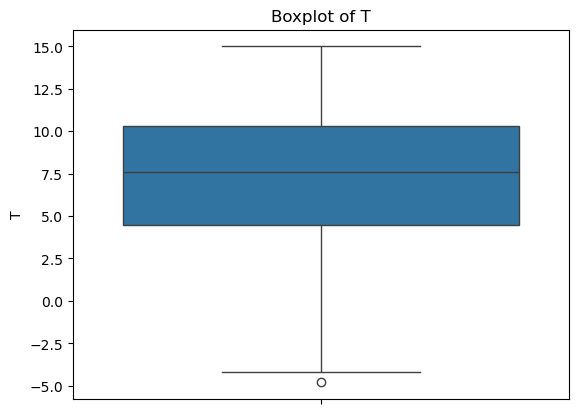

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(df_2023_station['T'])
plt.title('Boxplot of T')
plt.show()

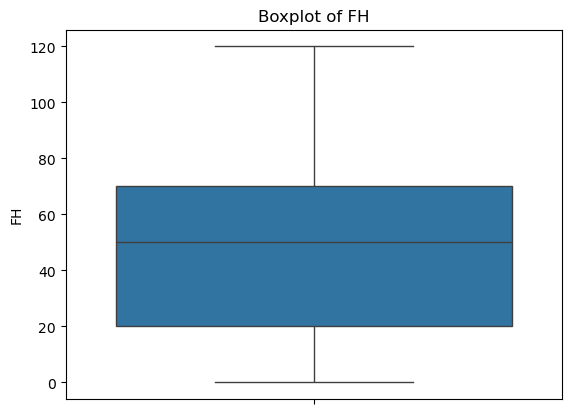

In [70]:
sns.boxplot(df_2023_station['FH'])
plt.title('Boxplot of FH')
plt.show()

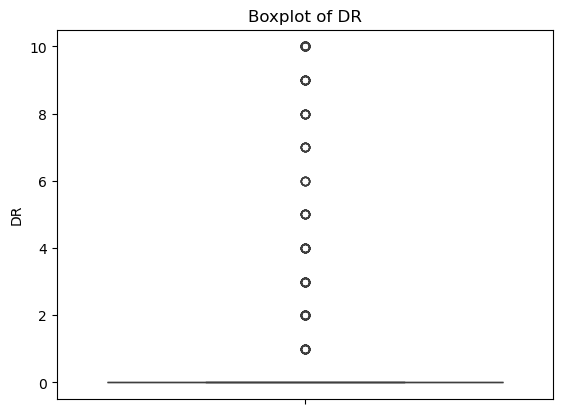

In [71]:
sns.boxplot(df_2023_station['DR'])
plt.title('Boxplot of DR')
plt.show()

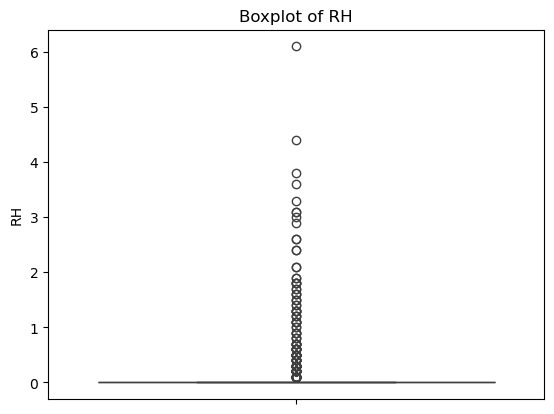

In [72]:
sns.boxplot(df_2023_station['RH'])
plt.title('Boxplot of RH')
plt.show()

In [73]:
# -1 values are all values that are 0.05 or less from measurements
df_2024.loc[df_2024["RH"] == -1, "RH"] = 0.05

# Format the temperature and rain properly
df_2024['T'] = df_2024['T'] * 0.1   # turn into C
df_2024['RH'] = df_2024['RH'] * 0.1  # turn into mm


# Format date
df_2024['date'] = pd.to_datetime(df_2024['date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")

# extract the day, month, and year components
df_2024['day'] = df_2024['date'].dt.day
df_2024['month'] = df_2024['date'].dt.month
df_2024['year'] = df_2024['date'].dt.year

df_2024 = df_2024.drop('date', axis = 1)


# 2024 time period - Nov 4 - Dec 1
# Remove rows from month 11 with day < 6
df_2024 = df_2024[~((df_2024['month'] == 11) & (df_2024['day'] < 4))]

# Remove rows from month 12 with day > 3
df_2024 = df_2024[~((df_2024['month'] == 12) & (df_2024['day'] > 1))]

# Remove all rows from month 10
df_2024 = df_2024[df_2024['month'] != 10]

print(df_2024)


# Station mask
df_2024_station = df_2024[df_2024['station_code'] == station]

df_2024_station['day_id'] = df_2024_station.groupby(['month', 'day']).ngroup() + 1

# Groupby day and month and get the mean
daily_avr_2024_station = df_2024_station.groupby(['day_id']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

print(daily_avr_2024_station)

       station_code  hour    FH    T   DR   RH  day  month  year
168             209     1  50.0  NaN  NaN  NaN    4     11  2024
169             209     2  40.0  NaN  NaN  NaN    4     11  2024
170             209     3  40.0  NaN  NaN  NaN    4     11  2024
171             209     4  50.0  NaN  NaN  NaN    4     11  2024
172             209     5  60.0  NaN  NaN  NaN    4     11  2024
...             ...   ...   ...  ...  ...  ...  ...    ...   ...
39715           391    20  30.0  5.5  0.0  0.0    1     12  2024
39716           391    21  30.0  5.5  0.0  0.0    1     12  2024
39717           391    22  30.0  5.5  0.0  0.0    1     12  2024
39718           391    23  30.0  5.6  0.0  0.0    1     12  2024
39719           391    24  30.0  6.1  0.0  0.0    1     12  2024

[30912 rows x 9 columns]
    day_id         FH          T        DR        RH
0        1  25.833333   7.325000  0.000000  0.000000
1        2  16.250000   6.479167  0.000000  0.000000
2        3  12.916667   9.950000  0

C:\Users\gr02n\AppData\Local\Temp\ipykernel_980\3149428054.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
import plotly.express as px

temperature_2023 = px.line(daily_avr_2023_station, x = 'day_id', y = 'T', title = 'Temperature 2023') # , color = 'name'
temperature_2023.show()

rain_2023 = px.line(daily_avr_2023_station, x = 'day_id', y = 'RH', title = 'Rain 2023')
rain_2023.show()

temperature_2024 = px.line(daily_avr_2024_station, x = 'day_id', y = 'T', title = 'Temperature 2024')
temperature_2024.show()

rain_2024 = px.line(daily_avr_2024_station, x = 'day_id', y = 'RH', title = 'Rain 2024')
rain_2024.show()

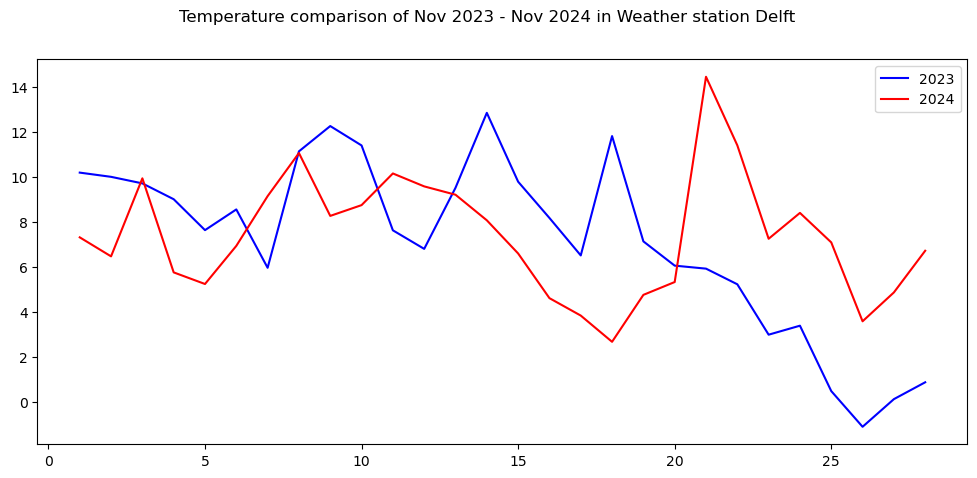

In [75]:
fig, ax_temp = plt.subplots(figsize=(12, 5))

l1, =ax_temp.plot(daily_avr_2023_station['day_id'], daily_avr_2023_station['T'], color = 'blue', label = '2023')
l2, =ax_temp.plot(daily_avr_2024_station['day_id'], daily_avr_2024_station['T'], color = 'red', label = '2023')

fig.suptitle(f'Temperature comparison of Nov 2023 - Nov 2024 in Weather station {station_name}')

ax_temp.legend([l1, l2], ['2023', '2024'])

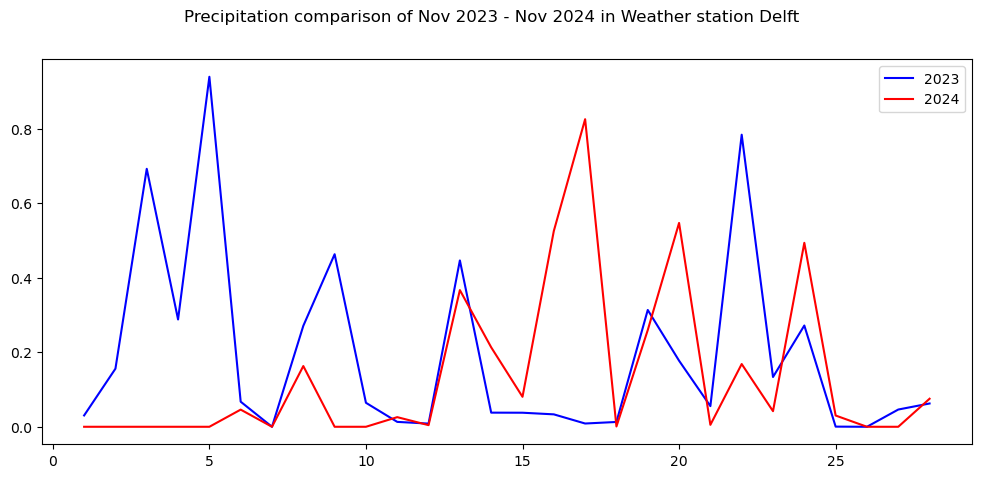

In [76]:
fig, ax_rain = plt.subplots(figsize=(12, 5))

l1, =ax_rain.plot(daily_avr_2023_station['day_id'], daily_avr_2023_station['RH'], color = 'blue', label = '2023')
l2, =ax_rain.plot(daily_avr_2024_station['day_id'], daily_avr_2024_station['RH'], color = 'red', label = '2023')

fig.suptitle(f'Precipitation comparison of Nov 2023 - Nov 2024 in Weather station {station_name}')

ax_rain.legend([l1, l2], ['2023', '2024'])

In [77]:
daily_avr_2023_station['year'] = 2023
daily_avr_2024_station['year'] = 2024

dfs = [daily_avr_2023_station, daily_avr_2024_station]
combined_df = pd.concat(dfs)

# combined_df

In [78]:
temperature_combined = px.line(combined_df, x = 'day_id', y = 'T', color = 'year', title = f'Temperature comparison of Nov 2023 - Nov 2024 in Weather station {station_name}',
                               labels={
                                "day_id": "Day of the chosen period",
                                "T": "Temperature"
                                })
temperature_combined.show()

rain_combined = px.line(combined_df, x = 'day_id', y = 'RH', color = 'year', title = f'Precipitation comparison of Nov 2023 - Nov 2024 in Weather station {station_name}',
                        labels={
                            "day_id": "Day of the chosen period",
                            "T": "Temperature"
                            })
rain_combined.show()

In [79]:
df_difference = pd.DataFrame()

df_difference['day_id'] = daily_avr_2023_station['day_id']
df_difference['T'] = daily_avr_2023_station['T'] - daily_avr_2024_station['T']
df_difference['RH'] = daily_avr_2023_station['RH'] - daily_avr_2024_station['RH']

# print(df_difference)

difference_T = px.line(df_difference, x = 'day_id', y = 'T', 
                       labels={
                            "day_id": "Day of the chosen period",
                            "T": "Temperature 2023 - 2024",
                            },
                       title = f'Temperature difference in November 2023-2024 for Weather station {station_name}') # , color = 'name'
difference_T.show()

difference_T = px.line(df_difference, x = 'day_id', y = 'RH', 
                       labels={
                            "day_id": "Day of the chosen period",
                            "RH": "Precipitation 2023 - 2024",
                            },
                       title = f'Precipitation difference in November 2023-2024 for Weather station {station_name}') # , color = 'name'
difference_T.show()
